# Mass and tracer conservation

The volume (=mass as the density $\rho$ is constant) in the shallow water equations is

$
    \int \eta + H dx = \Delta x^2( \sum_i \eta_i + \sum_i H_i)
$

and the relative change is therefore

$
    \frac{\sum_i \eta_i}{\sum_i H_i}
$

In [1]:
using NetCDF, PyPlot, ColorSchemes, Printf, Statistics, StatsBase
using ShallowWaters

# 1 Simulations for conservation experiments

In [2]:
path = "/home/kloewer/git/Isambard/data"

"/home/kloewer/git/Isambard/data"

In [ ]:
# Float64
run_model(Float64,nx=200,Ndays=500,tracer_relaxation=false,output=true,outpath=path)

In [ ]:
# Float16
run_model(Float16,nx=200,Ndays=500,tracer_relaxation=false,output=true,outpath=path)

In [ ]:
# Float16 compensated
run_model(Float16,nx=200,Ndays=500,tracer_relaxation=false,output=true,outpath=path,compensated=true)

In [ ]:
# Float16/32 mixed
run_model(Float16,Tprog=Float32,nx=200,Ndays=500,tracer_relaxation=false,output=true,outpath=path,compensated=false)

In [3]:
# water depth H at rest
P = ShallowWaters.Parameter(T=Float64,nx=200,Lx=4000e3)
G = ShallowWaters.Grid{Float64,Float64}(P)
H = ShallowWaters.Ridges(Float64,P,G)[2:end-1,2:end-1];

In [4]:
# Float16 compensated
ncfile = NetCDF.open(joinpath(path,"run0002","sst.nc"))
sst16 = mean(ncfile.vars["sst"],dims=(1,2))[1,1,:];
ncfile = NetCDF.open(joinpath(path,"run0002","eta.nc"))
eta16 = sum(ncfile.vars["eta"],dims=(1,2))[1,1,:];

In [5]:
# Float16 uncompensated
ncfile = NetCDF.open(joinpath(path,"run0001","sst.nc"))
sst16_uncomp = mean(ncfile.vars["sst"],dims=(1,2))[1,1,:];
ncfile = NetCDF.open(joinpath(path,"run0001","eta.nc"))
eta16_uncomp = sum(ncfile.vars["eta"],dims=(1,2))[1,1,:];

In [6]:
# Float64
ncfile = NetCDF.open(joinpath(path,"run0000","sst.nc"))
sst64 = mean(ncfile.vars["sst"],dims=(1,2))[1,1,:];
ncfile = NetCDF.open(joinpath(path,"run0000","eta.nc"))
eta64 = sum(ncfile.vars["eta"],dims=(1,2))[1,1,:];

In [7]:
# Float16/32 mixed-precision
ncfile = NetCDF.open(joinpath(path,"run0003","sst.nc"))
sst1632 = mean(ncfile.vars["sst"],dims=(1,2))[1,1,:];
ncfile = NetCDF.open(joinpath(path,"run0003","eta.nc"))
eta1632 = sum(ncfile.vars["eta"],dims=(1,2))[1,1,:];

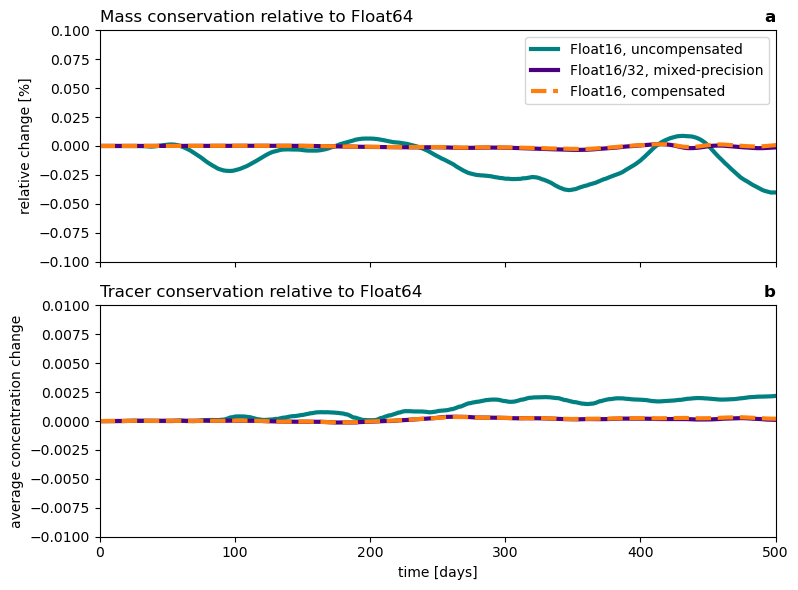

In [8]:
V = sum(H)

fig,(ax1,ax2) = subplots(2,1,figsize=(8,6),sharex=true)

ax1.plot(100*((eta16_uncomp-eta64)/V),color="teal",label="Float16, uncompensated",lw=3)
ax1.plot(100*((eta1632-eta64)/V),color="indigo",label="Float16/32, mixed-precision",lw=3)
ax1.plot(100*((eta16-eta64)/V),color="C1",label="Float16, compensated",lw=3,ls="--")

ax2.plot(sst16_uncomp-sst64,color="teal",label="Float16, uncompensated",lw=3)
ax2.plot(sst1632-sst64,color="indigo",label="Float16/32, mixed-precision",lw=3)
ax2.plot(sst16-sst64,color="C1",label="Float16, compensated",lw=3,ls="--")

ax1.set_ylim(-0.1,0.1)
ax1.set_ylabel("relative change [%]")

ax2.set_xlim(0,500)
ax2.set_xlabel("time [days]")
ax2.set_ylim(-0.01,0.01)
ax2.set_ylabel("average concentration change")

ax1.legend()

ax1.set_title("Mass conservation relative to Float64",loc="left")
ax2.set_title("Tracer conservation relative to Float64",loc="left")
ax1.set_title("a",loc="right",fontweight="bold")
ax2.set_title("b",loc="right",fontweight="bold")

tight_layout()
savefig("conservation.png",dpi=200)
savefig("conservation.pdf")